In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [39]:
df = pd.read_csv('data.csv')

## Data Cleaning

#### Handling null values

##### Recognizing null values with a value in between 97 and 99 (kaggle documentation)

In [40]:
df['DATE_DIED'] = [2 if row =='9999-99-99' else 1 for row in df['DATE_DIED']]
df = df.rename(columns={'DATE_DIED':'DIED'})

df = df.where((df<97)|(df>99))

##### Dropping null columns and filling null values with mode

In [41]:
missing_percentage = df.isna().sum() / len(df) * 100

columns_to_drop = missing_percentage[missing_percentage > 5].index
df = df.drop(columns=columns_to_drop)

print(df.isna().sum()/len(df)*100)

USMER                   0.000000
MEDICAL_UNIT            0.000000
SEX                     0.000000
PATIENT_TYPE            0.000000
DIED                    0.000000
PNEUMONIA               1.526166
AGE                     0.032902
DIABETES                0.318337
COPD                    0.286389
ASTHMA                  0.284100
INMSUPR                 0.324631
HIPERTENSION            0.296021
OTHER_DISEASE           0.481129
CARDIOVASCULAR          0.293350
OBESITY                 0.289154
RENAL_CHRONIC           0.286675
TOBACCO                 0.307083
CLASIFFICATION_FINAL    0.000000
dtype: float64


In [42]:
columns_to_fill = df.columns[df.isna().sum() > 0]
for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mode()[0])

print(df.isna().sum()/len(df)*100)
cleaned_df = df

USMER                   0.0
MEDICAL_UNIT            0.0
SEX                     0.0
PATIENT_TYPE            0.0
DIED                    0.0
PNEUMONIA               0.0
AGE                     0.0
DIABETES                0.0
COPD                    0.0
ASTHMA                  0.0
INMSUPR                 0.0
HIPERTENSION            0.0
OTHER_DISEASE           0.0
CARDIOVASCULAR          0.0
OBESITY                 0.0
RENAL_CHRONIC           0.0
TOBACCO                 0.0
CLASIFFICATION_FINAL    0.0
dtype: float64


##### Removing remaining columns outlier

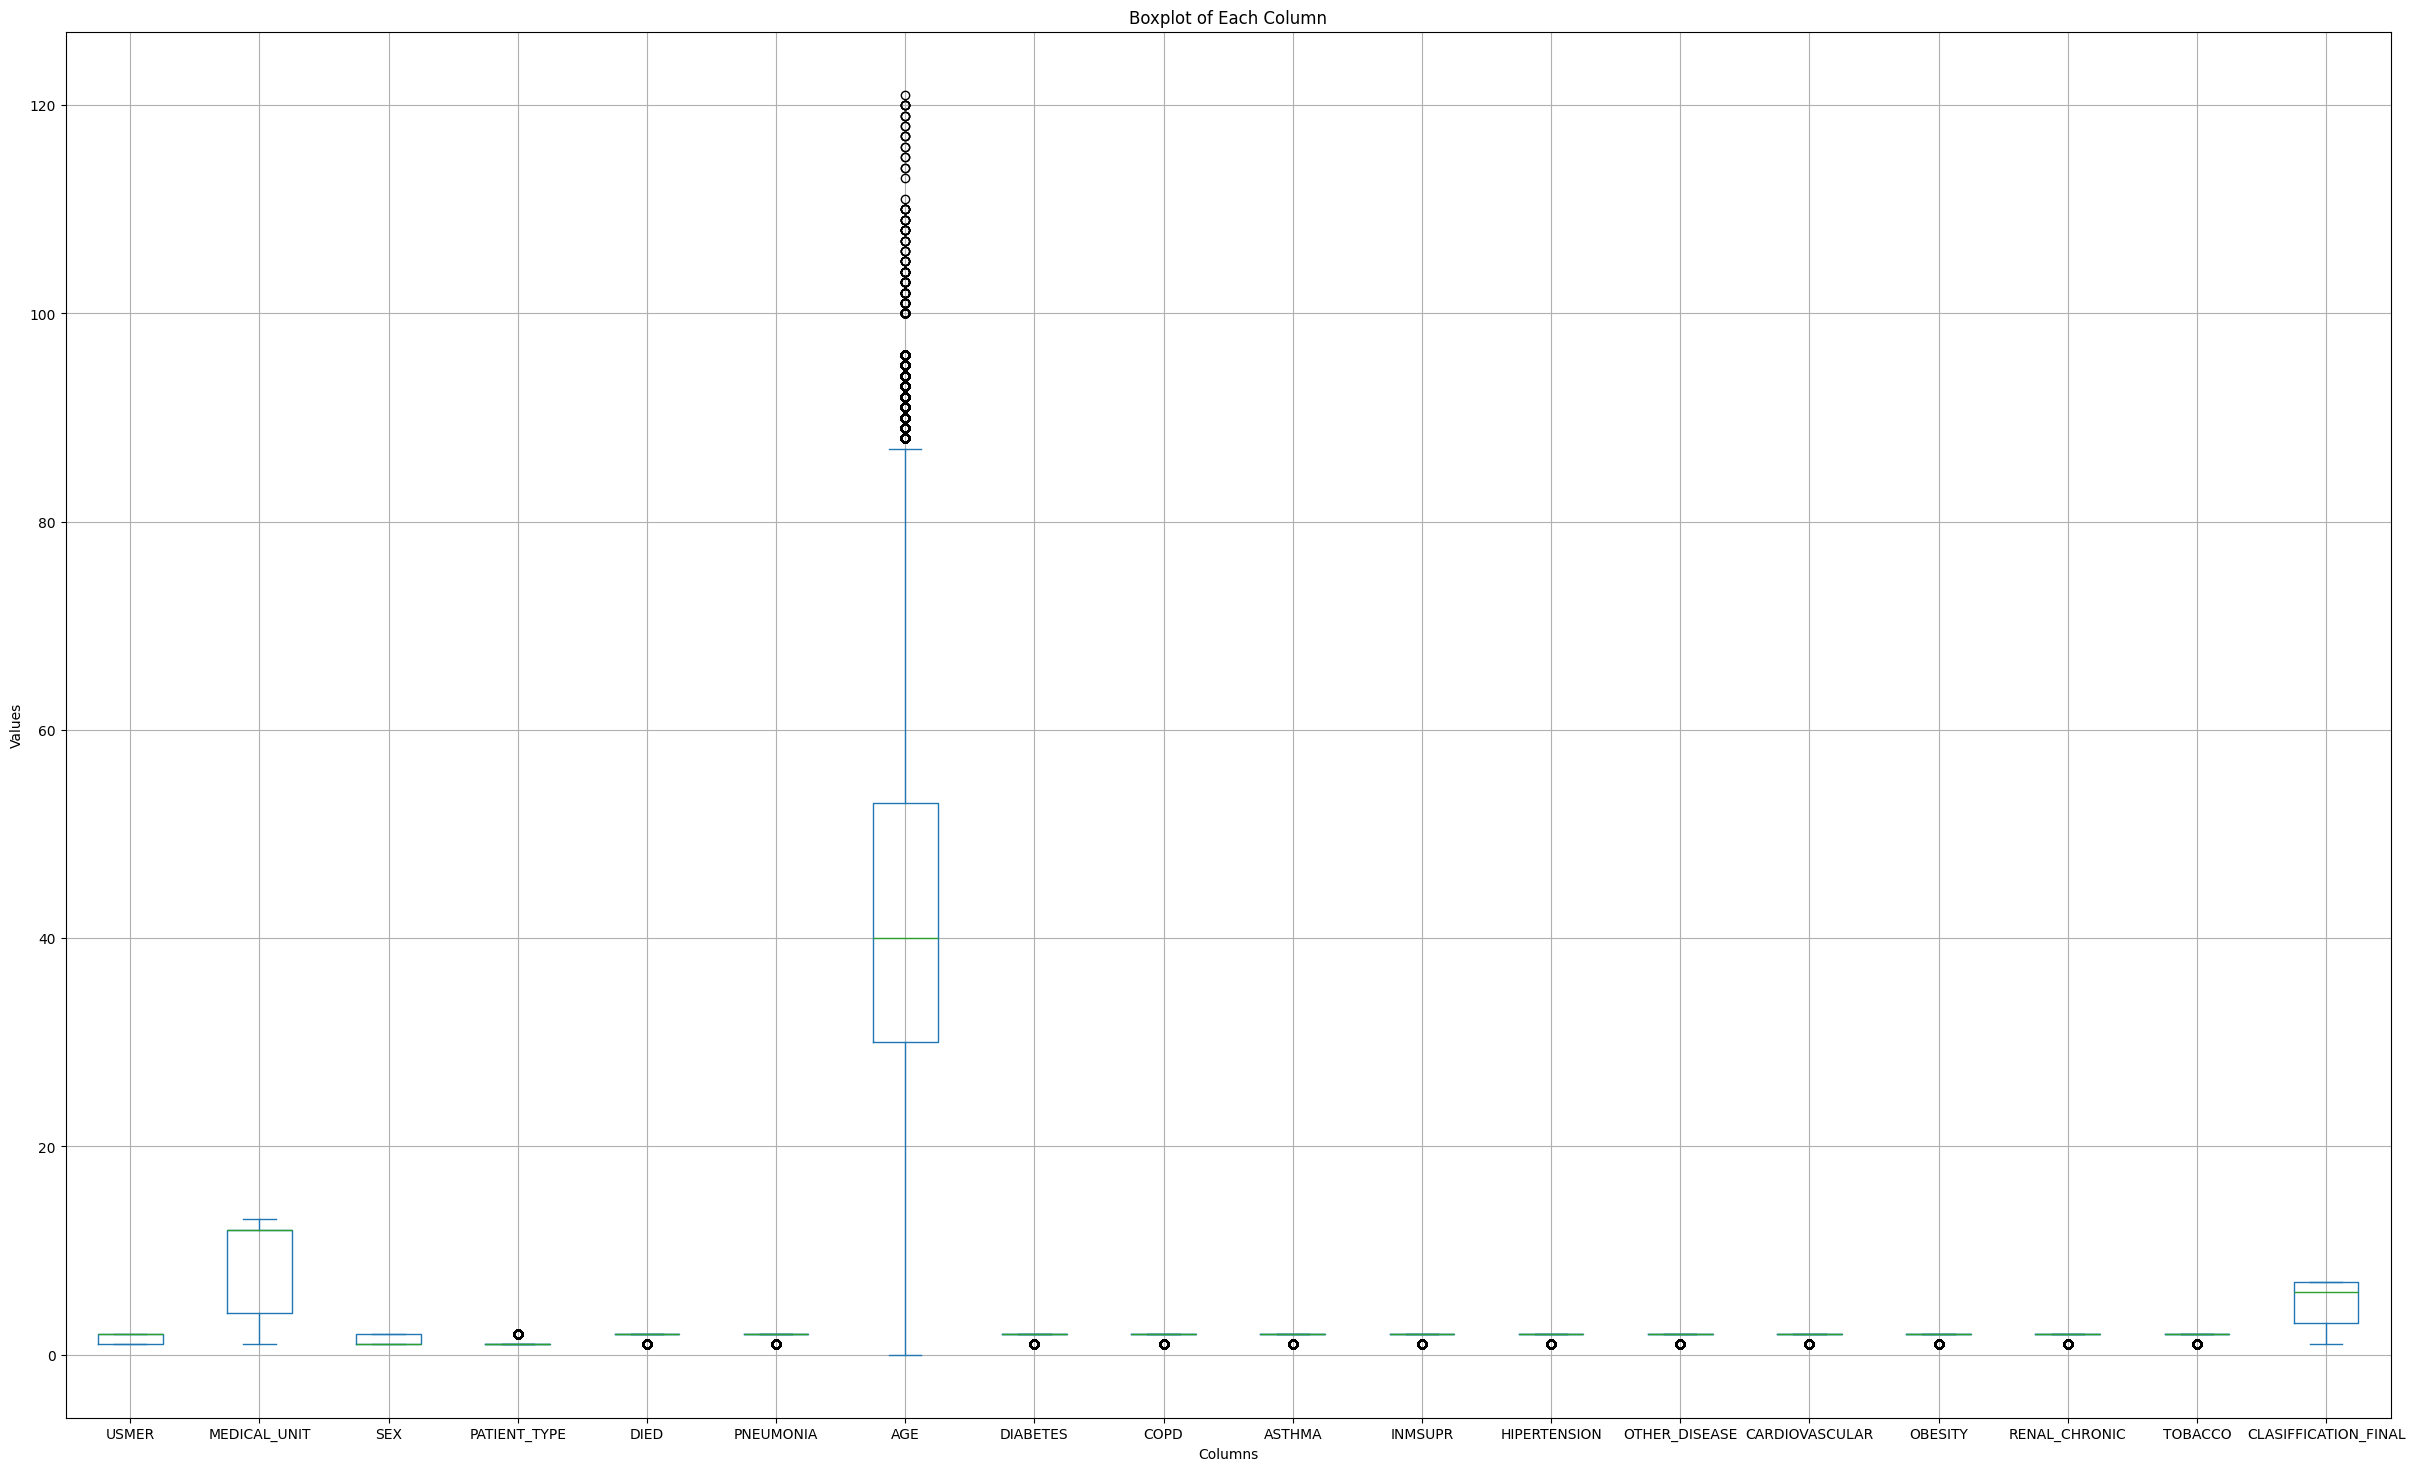

In [43]:
cleaned_df.plot.box(figsize=(30, 18), grid=True)

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of Each Column')

# Show the plot
plt.show()

In [44]:
age_iqr = cleaned_df['AGE'].quantile(0.75) - cleaned_df['AGE'].quantile(0.25)
age_outliers = cleaned_df['AGE'].quantile(0.75) + 1.5 * age_iqr 

cleaned_df = cleaned_df[cleaned_df['AGE'] < age_outliers]

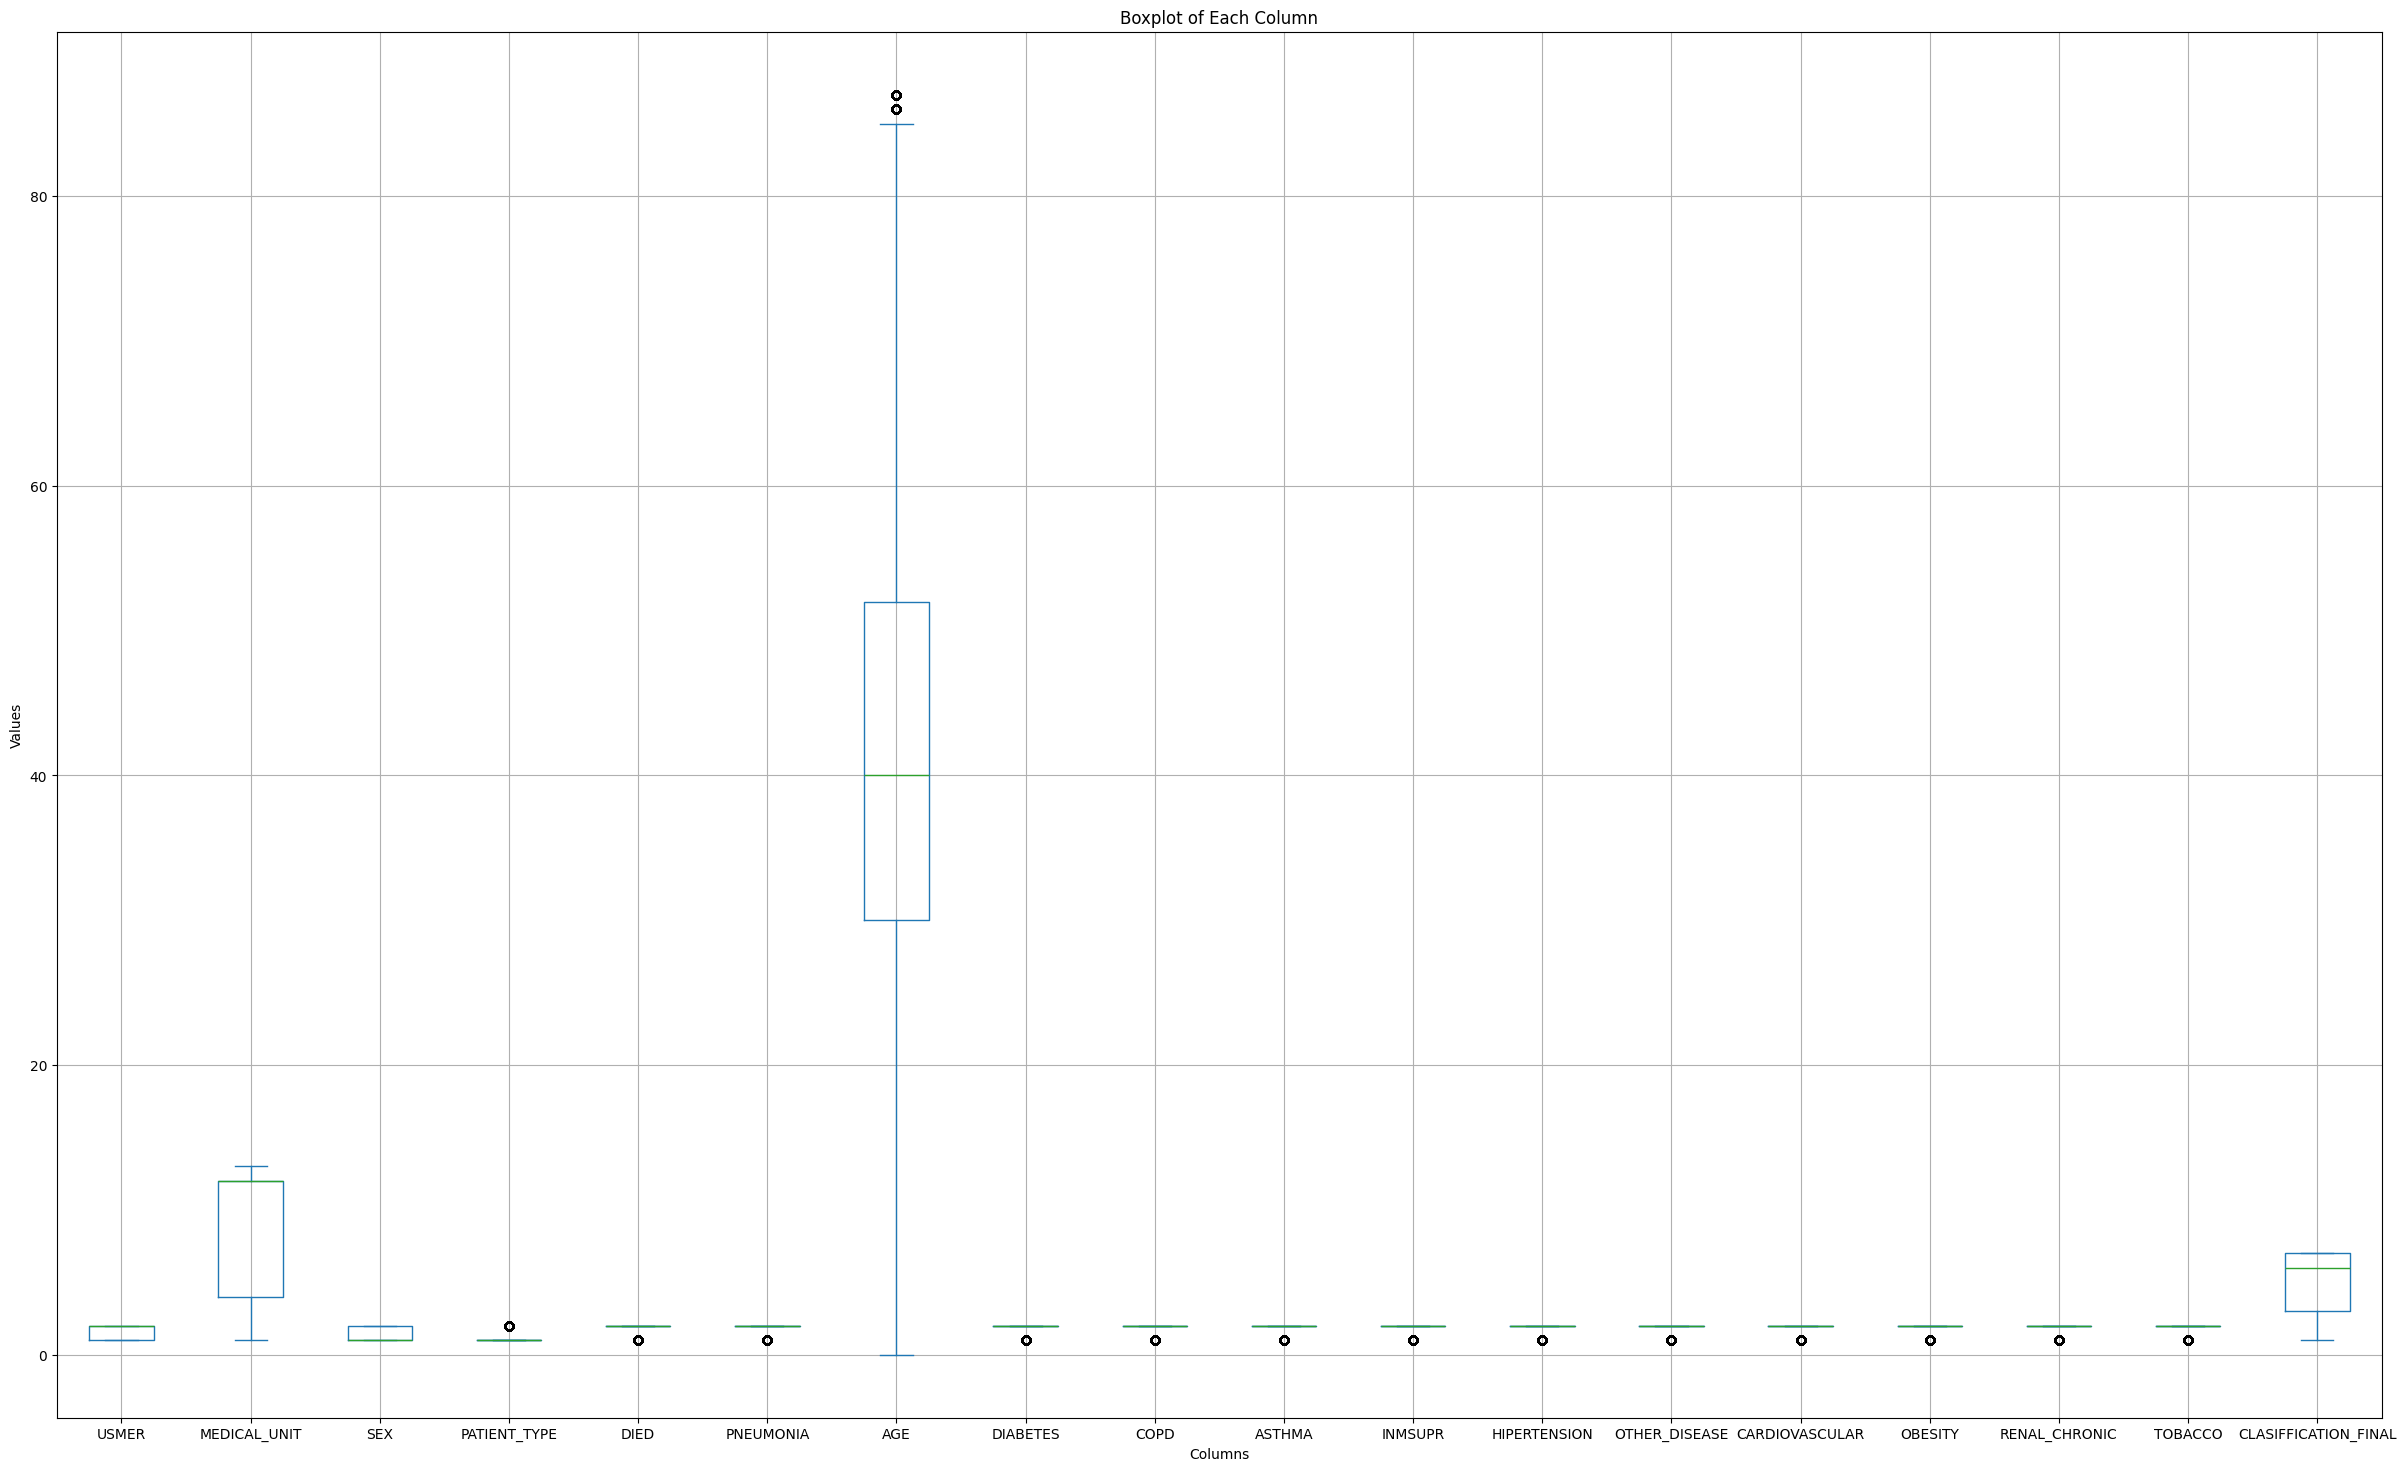

In [45]:
cleaned_df.plot.box(figsize=(30, 18), grid=True)

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of Each Column')

# Show the plot
plt.show()

## Data Reduction

#### Checking redundant feature

##### Using correlation matrix to display features correlation

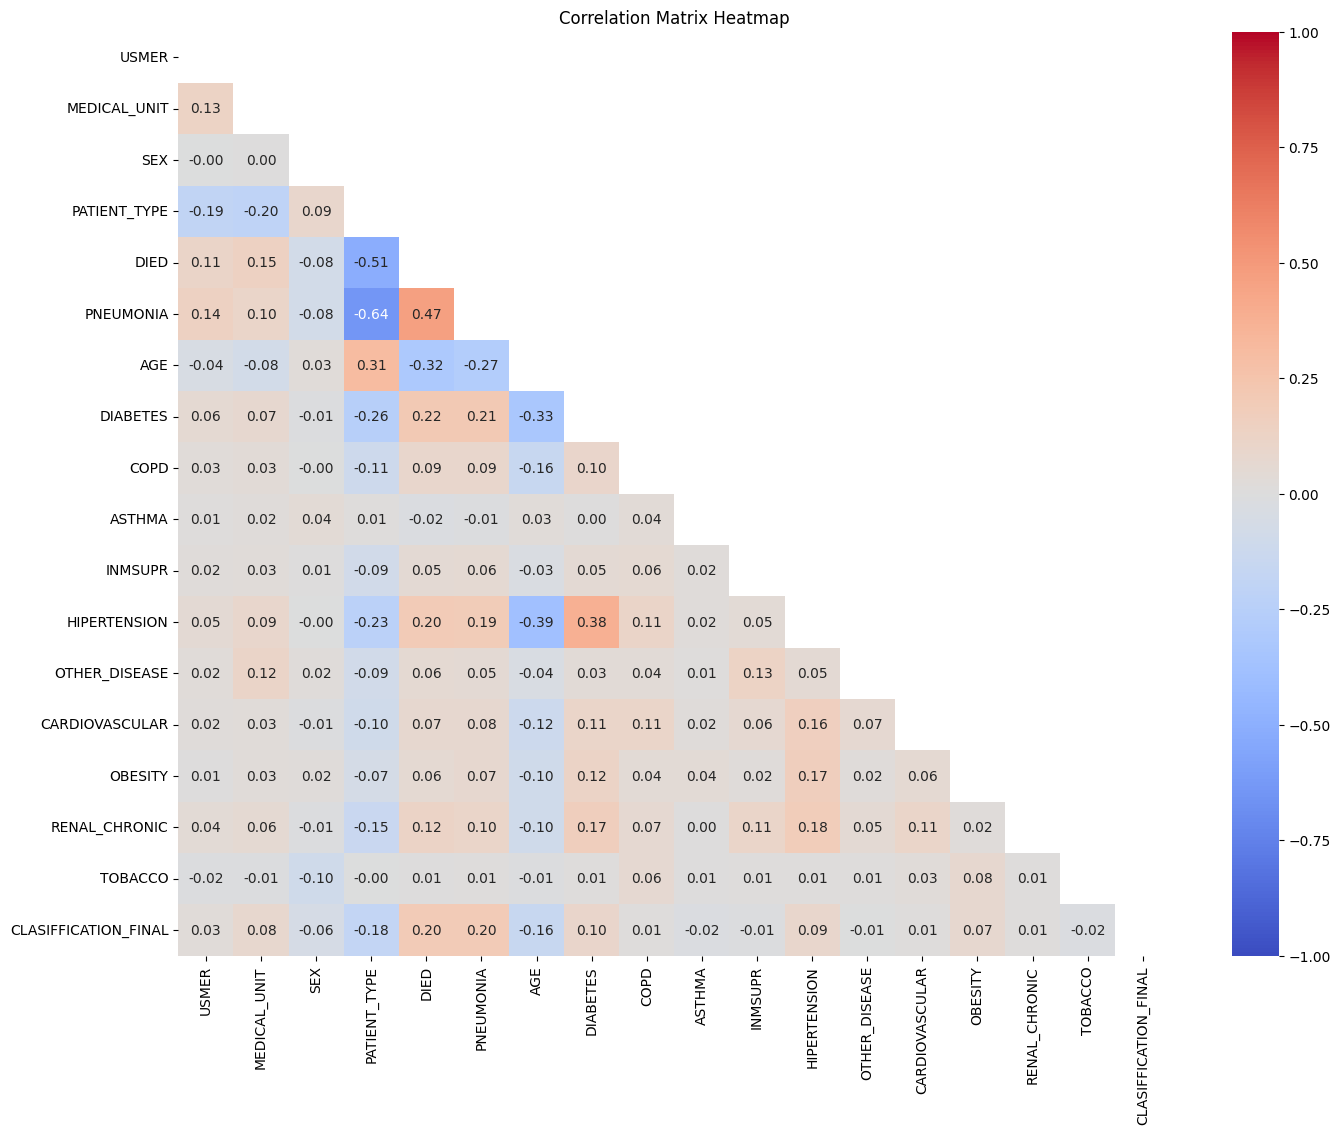

In [46]:
corr = cleaned_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask,annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Finding Principal Components

##### Determining the selected principal components

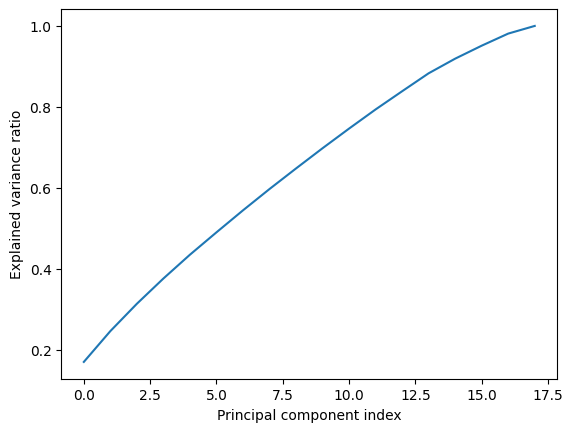

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cleaned_df)

pca = PCA()
pc = pca.fit_transform(X_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [48]:
cumulative_variance_ration = np.cumsum(pca.explained_variance_ratio_)
threshold_index = np.argmax(cumulative_variance_ration > 0.8)

In [49]:
selected_pc = pc[:, :threshold_index]
pc_df = pd.DataFrame(data=selected_pc, columns=[f'PC{i+1}' for i in range(threshold_index)])

In [50]:
pc_df.to_csv('pca.csv', index=False)